In [8]:
import pandas as pd

topics = pd.read_csv('data/part3/topics.csv')

topics.drop('Unnamed: 0', axis=1, inplace=True)
topics.to_csv('data/part3/topics.csv', index=False)

In [10]:
tweets = pd.read_csv('data/tweets/processed_all_tweets.csv')

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

    
common_words = get_top_n_words(tweets.filtered_text, 20)
unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

In [13]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(tweets.filtered_text, 10)
trigram = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

In [14]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(
analyzer='word',       
min_df=3,# minimum required occurences of a word 
stop_words='english',# remove stop words
lowercase=True,# convert all words to lowercase
token_pattern='[a-zA-Z0-9]{2,}',# num chars > 3
max_features=5000,# max number of unique words
                            )
data_matrix = vectorizer.fit_transform(tweets.filtered_text)
data_matrix

<12963x3283 sparse matrix of type '<class 'numpy.int64'>'
	with 56461 stored elements in Compressed Sparse Row format>

In [15]:
lda_model = LatentDirichletAllocation(
    n_components=10, # Number of topics
    learning_method='online',
    random_state=20,       
    n_jobs = -1 )


lda_output = lda_model.fit_transform(data_matrix)

In [35]:
for i,topic in enumerate(lda_model.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[j] for j in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['dragon', 'public', 'fun', 'station', 'best', 'way', 'right', 'model', 'time', 'yes']


Top 10 words for topic #1:
['pretty', 'rocket', 'earth', 'engine', 'falcon', 'launch', 'coming', 'probably', 'starship', 'true']


Top 10 words for topic #2:
['battery', 'today', 'ago', 'safety', 'problem', 'hard', 'thanks', 'need', 'production', 'exactly']


Top 10 words for topic #3:
['especially', 'video', 'air', 'engineering', 'doesnt', 'electric', 'real', 'high', 'car', 'like']


Top 10 words for topic #4:
['wow', 'range', 'autopilot', 'times', 'days', 'important', 'hopefully', 'going', 'think', 'make']


Top 10 words for topic #5:
['free', 'later', 'definitely', 'little', 'design', 'know', 'love', 'people', 'actually', 'yeah']


Top 10 words for topic #6:
['making', 'cost', 'people', 'money', 'cool', 'future', 'use', 'lot', 'maybe', 'soon']


Top 10 words for topic #7:
['truth', 'say', 'power', 'solar', 'long', 'world', 'mass', 'day', 'better', 'sure']


Top 10 word

In [40]:
words = [vectorizer.get_feature_names()[j] for j in lda_model.components_[0].argsort()[-10:]]

words

c:\Users\levit\.pyenv\pyenv-win\versions\3.10.7\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['dragon',
 'public',
 'fun',
 'station',
 'best',
 'way',
 'right',
 'model',
 'time',
 'yes']

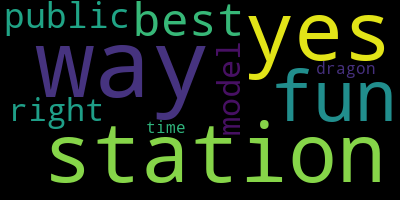

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud().generate_from_frequencies(dict(zip(words, lda_model.components_[0])))

wordcloud.to_image()